In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
rental_office_raw = pd.read_csv("data/공공자전거 대여소 정보.csv", encoding='utf8')
rental_office_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   대여소
번호       2719 non-null   float64
 1   보관소(대여소)명    2719 non-null   object 
 2   소재지(위치)      2720 non-null   object 
 3   Unnamed: 3   2720 non-null   object 
 4   Unnamed: 4   2720 non-null   object 
 5   Unnamed: 5   2720 non-null   object 
 6   설치
시기        2719 non-null   object 
 7   설치형태         1202 non-null   object 
 8   Unnamed: 8   1522 non-null   object 
 9   운영
방식        2719 non-null   object 
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

In [4]:
rental_usage_raw = pd.read_csv("data/서울특별시 공공자전거 이용정보(월별)_24.1-6.csv", encoding='cp949')
rental_usage_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613732 entries, 0 to 613731
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     613732 non-null  int64  
 1   대여소번호    613732 non-null  int64  
 2   대여소명     613732 non-null  object 
 3   대여구분코드   613732 non-null  object 
 4   성별       418815 non-null  object 
 5   연령대코드    613732 non-null  object 
 6   이용건수     613732 non-null  int64  
 7   운동량      613377 non-null  float64
 8   탄소량      613377 non-null  float64
 9   이동거리(M)  613732 non-null  float64
 10  이용시간(분)  613732 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 51.5+ MB


In [5]:
print(rental_office_raw.isna().sum(axis=0))
print(rental_usage_raw.isna().sum(axis=0))

대여소\n번호           4
보관소(대여소)명         4
소재지(위치)           3
Unnamed: 3        3
Unnamed: 4        3
Unnamed: 5        3
설치\n시기            4
설치형태           1521
Unnamed: 8     1201
운영\n방식            4
Unnamed: 10    2723
Unnamed: 11    2723
Unnamed: 12    2723
Unnamed: 13    2723
Unnamed: 14    2723
Unnamed: 15    2723
Unnamed: 16    2723
Unnamed: 17    2723
Unnamed: 18    2723
Unnamed: 19    2723
Unnamed: 20    2723
dtype: int64
대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         194917
연령대코드           0
이용건수            0
운동량           355
탄소량           355
이동거리(M)         0
이용시간(분)         0
dtype: int64


In [6]:
rental_usage_raw["성별"].unique()
rental_usage_raw["성별"].str.upper().unique()
rental_usage_raw.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202401,102,102. 망원역 1번출구 앞,일일권,NaN,20대,30,1562.85,14.77,63766.65,547
1,202401,102,102. 망원역 1번출구 앞,일일권,NaN,30대,21,1082.06,9.53,41075.31,393
2,202401,102,102. 망원역 1번출구 앞,일일권,NaN,40대,4,82.63,0.73,3178.67,66
3,202401,102,102. 망원역 1번출구 앞,일일권,NaN,50대,3,160.96,1.63,7009.09,44
4,202401,102,102. 망원역 1번출구 앞,일일권,NaN,기타,4,68.96,0.78,3375.82,40


In [7]:
rental_usage = rental_usage_raw
rental_usage["성별"] = rental_usage_raw["성별"].str.upper()
rental_usage["성별"] = rental_usage["성별"].fillna("E")
print(rental_usage.info())
print(rental_usage.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613732 entries, 0 to 613731
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     613732 non-null  int64  
 1   대여소번호    613732 non-null  int64  
 2   대여소명     613732 non-null  object 
 3   대여구분코드   613732 non-null  object 
 4   성별       613732 non-null  object 
 5   연령대코드    613732 non-null  object 
 6   이용건수     613732 non-null  int64  
 7   운동량      613377 non-null  float64
 8   탄소량      613377 non-null  float64
 9   이동거리(M)  613732 non-null  float64
 10  이용시간(분)  613732 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 51.5+ MB
None
Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')


In [8]:
print(rental_usage.head())
print(rental_usage.shape)

rental_usage.dropna(axis=0)
print(rental_usage.shape)

rental_usage.drop(["운동량", "탄소량"], axis=1, inplace=True)
print(rental_usage.shape)

print(rental_usage.head())


     대여일자  대여소번호             대여소명 대여구분코드 성별 연령대코드  이용건수      운동량    탄소량  \
0  202401    102  102. 망원역 1번출구 앞    일일권  E   20대    30  1562.85  14.77   
1  202401    102  102. 망원역 1번출구 앞    일일권  E   30대    21  1082.06   9.53   
2  202401    102  102. 망원역 1번출구 앞    일일권  E   40대     4    82.63   0.73   
3  202401    102  102. 망원역 1번출구 앞    일일권  E   50대     3   160.96   1.63   
4  202401    102  102. 망원역 1번출구 앞    일일권  E    기타     4    68.96   0.78   

    이동거리(M)  이용시간(분)  
0  63766.65      547  
1  41075.31      393  
2   3178.67       66  
3   7009.09       44  
4   3375.82       40  
(613732, 11)
(613732, 11)
(613732, 9)
     대여일자  대여소번호             대여소명 대여구분코드 성별 연령대코드  이용건수   이동거리(M)  이용시간(분)
0  202401    102  102. 망원역 1번출구 앞    일일권  E   20대    30  63766.65      547
1  202401    102  102. 망원역 1번출구 앞    일일권  E   30대    21  41075.31      393
2  202401    102  102. 망원역 1번출구 앞    일일권  E   40대     4   3178.67       66
3  202401    102  102. 망원역 1번출구 앞    일일권  E   50대     3   7009.09       4

In [9]:
print(rental_usage["이동거리(M)"])
rental_usage.info()
rental_usage["건당 이동거리(M)"] = rental_usage["이동거리(M)"] / rental_usage["이용건수"]
rental_usage["건당 이용시간(분)"] = rental_usage["이용시간(분)"] / rental_usage["이용건수"]
rental_usage.head()

0         63766.65
1         41075.31
2          3178.67
3          7009.09
4          3375.82
            ...   
613727    41536.12
613728    44985.84
613729    54063.87
613730    15826.52
613731    20636.72
Name: 이동거리(M), Length: 613732, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613732 entries, 0 to 613731
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     613732 non-null  int64  
 1   대여소번호    613732 non-null  int64  
 2   대여소명     613732 non-null  object 
 3   대여구분코드   613732 non-null  object 
 4   성별       613732 non-null  object 
 5   연령대코드    613732 non-null  object 
 6   이용건수     613732 non-null  int64  
 7   이동거리(M)  613732 non-null  float64
 8   이용시간(분)  613732 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 42.1+ MB


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202401,102,102. 망원역 1번출구 앞,일일권,E,20대,30,63766.65,547,2125.555000,18.233333
1,202401,102,102. 망원역 1번출구 앞,일일권,E,30대,21,41075.31,393,1955.967143,18.714286
2,202401,102,102. 망원역 1번출구 앞,일일권,E,40대,4,3178.67,66,794.667500,16.500000
3,202401,102,102. 망원역 1번출구 앞,일일권,E,50대,3,7009.09,44,2336.363333,14.666667
4,202401,102,102. 망원역 1번출구 앞,일일권,E,기타,4,3375.82,40,843.955000,10.000000


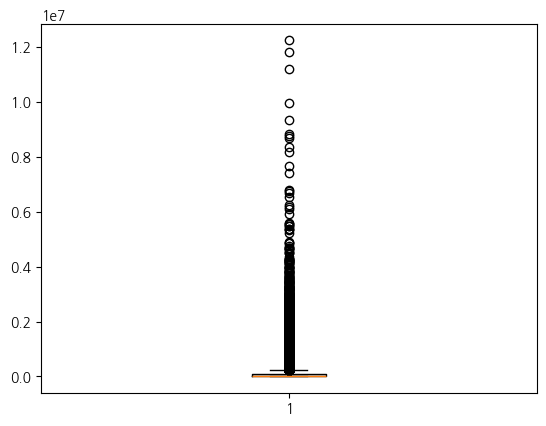

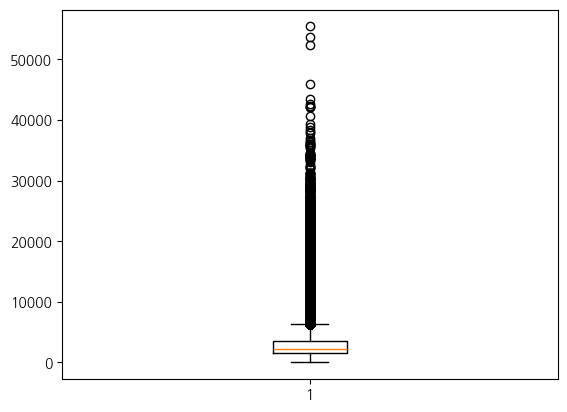

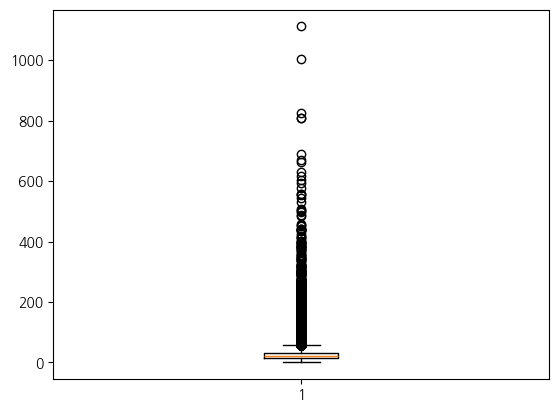

In [10]:
# 박스플롯 그려보기
plt.boxplot(rental_usage["이동거리(M)"])
plt.show()

plt.boxplot(rental_usage["건당 이동거리(M)"])
plt.show()

plt.boxplot(rental_usage["건당 이용시간(분)"])
plt.show()

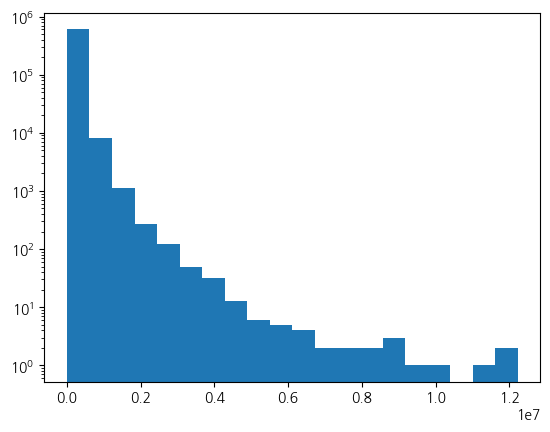

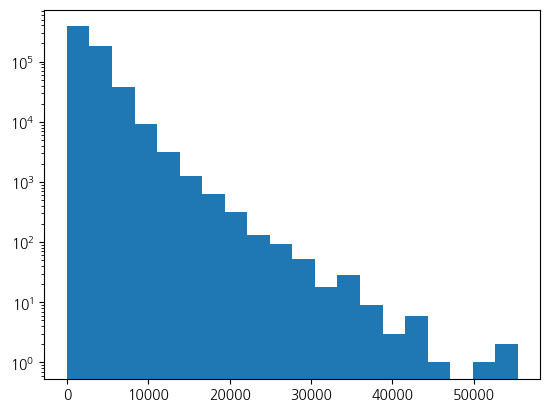

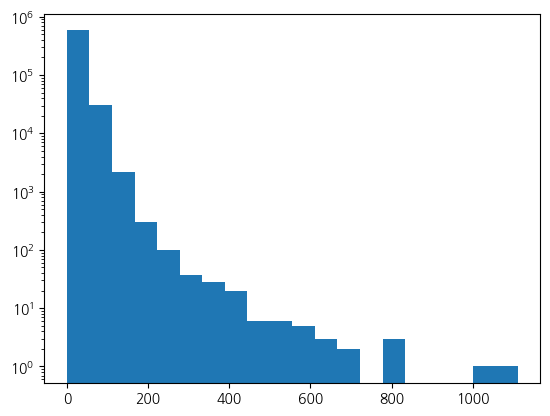

In [43]:
# 히스토그램 그려보기
plt.hist(rental_usage["이동거리(M)"], log=True, bins=20)
plt.show()

plt.hist(rental_usage["건당 이동거리(M)"], log=True, bins=20)
plt.show()

plt.hist(rental_usage["건당 이용시간(분)"], log=True, bins=20)
plt.show()

In [32]:
rental_usage_new = rental_usage
print(rental_usage.shape, rental_usage_new.shape)

# 건당 이동거리가 10000이하인 데이터만 가져오기
rental_usage_new = rental_usage_new[rental_usage_new['건당 이동거리(M)'] < 40000]
print(rental_usage.shape, rental_usage_new.shape)

# 건당 이용시간이 60이하인 데이터만 가져오기
rental_usage_new = rental_usage_new[rental_usage_new['건당 이용시간(분)'] < 120]
print(rental_usage.shape, rental_usage_new.shape)

rental_usage_new.tail()

(613732, 11) (613732, 11)
(613732, 11) (613721, 11)
(613732, 11) (611933, 11)


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
613727,202406,6173,6173. 서울자동차운전전문학원,정기권,M,40대,15,41536.12,342,2769.074667,22.800000
613728,202406,6173,6173. 서울자동차운전전문학원,정기권,M,50대,16,44985.84,402,2811.615000,25.125000
613729,202406,6173,6173. 서울자동차운전전문학원,정기권,M,60대,28,54063.87,363,1930.852500,12.964286
613730,202406,6173,6173. 서울자동차운전전문학원,정기권,M,~10대,10,15826.52,104,1582.652000,10.400000
613731,202406,6173,6173. 서울자동차운전전문학원,정기권,M,기타,10,20636.72,155,2063.672000,15.500000


In [34]:
rental_usage_new = rental_usage_new.reset_index(drop=True)
rental_usage_new.tail()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
611928,202406,6173,6173. 서울자동차운전전문학원,정기권,M,40대,15,41536.12,342,2769.074667,22.800000
611929,202406,6173,6173. 서울자동차운전전문학원,정기권,M,50대,16,44985.84,402,2811.615000,25.125000
611930,202406,6173,6173. 서울자동차운전전문학원,정기권,M,60대,28,54063.87,363,1930.852500,12.964286
611931,202406,6173,6173. 서울자동차운전전문학원,정기권,M,~10대,10,15826.52,104,1582.652000,10.400000
611932,202406,6173,6173. 서울자동차운전전문학원,정기권,M,기타,10,20636.72,155,2063.672000,15.500000


In [60]:
# 데이터 탐색 (EDA)

# 성별별 이용 건수
print(rental_usage_new.groupby("성별")["이용건수"].count())
print(rental_usage_new.groupby("성별")["이용건수"].sum())

# 성별별 건당 이용시간 평균
print(rental_usage_new.groupby("성별")["건당 이용시간(분)"].mean())

# 성별별 건당 이동거리 평균
print(rental_usage_new.groupby("성별")["건당 이동거리(M)"].mean())

성별
E    194208
F    196541
M    221184
Name: 이용건수, dtype: int64
성별
E    5983935
F    5722823
M    9702715
Name: 이용건수, dtype: int64
성별
E    25.094327
F    26.290917
M    23.534142
Name: 건당 이용시간(분), dtype: float64
성별
E    2893.667460
F    2836.529480
M    2800.118899
Name: 건당 이동거리(M), dtype: float64


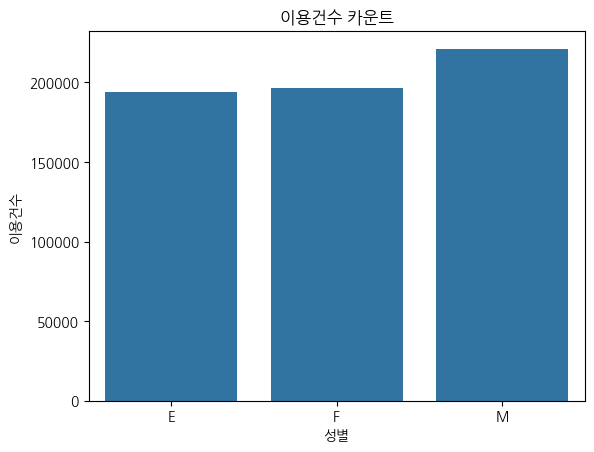

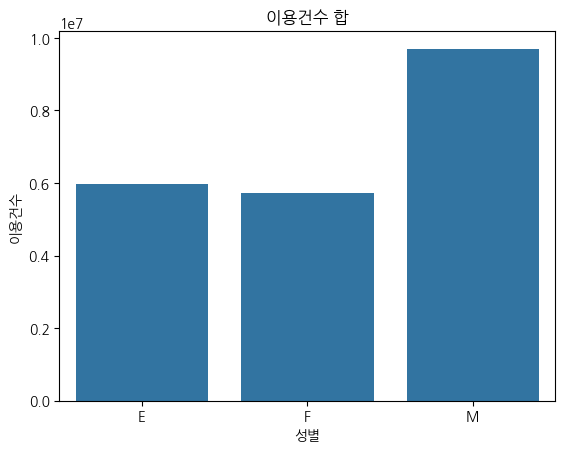

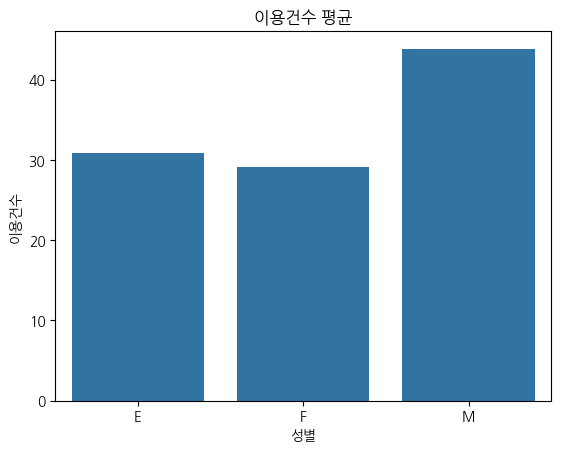

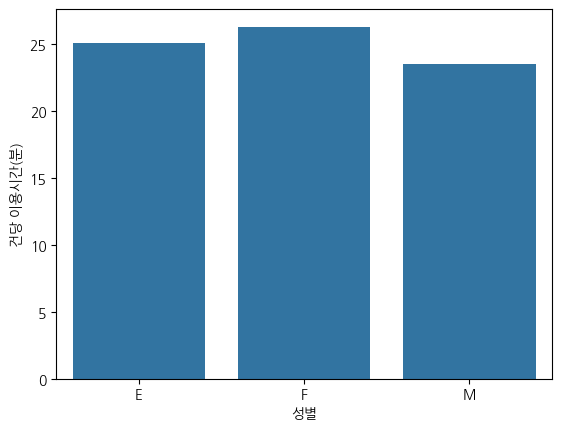

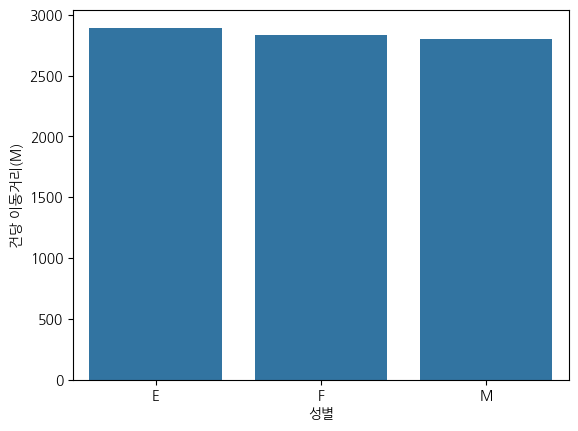

In [62]:
# 성별별 이용 건수
sns.barplot(rental_usage_new.groupby("성별")["이용건수"].count())
plt.title("이용건수 카운트")
plt.show()

sns.barplot(rental_usage_new.groupby("성별")["이용건수"].sum())
plt.title("이용건수 합")
plt.show()

sns.barplot(rental_usage_new.groupby("성별")["이용건수"].mean())
plt.title("이용건수 평균")
plt.show()

# 성별별 건당 이용시간 평균
sns.barplot(rental_usage_new.groupby("성별")["건당 이용시간(분)"].mean())
plt.show()

# 성별별 건당 이동거리 평균
sns.barplot(rental_usage_new.groupby("성별")["건당 이동거리(M)"].mean())
plt.show()

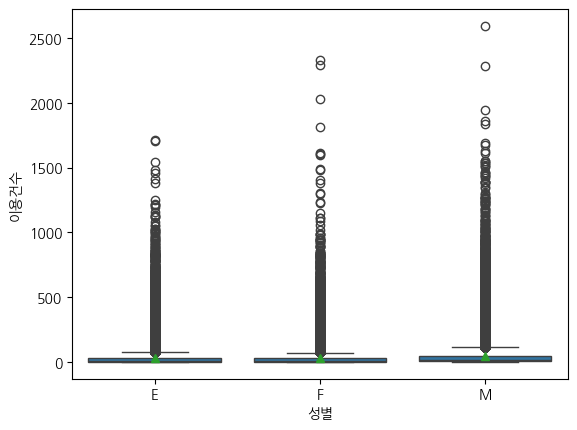

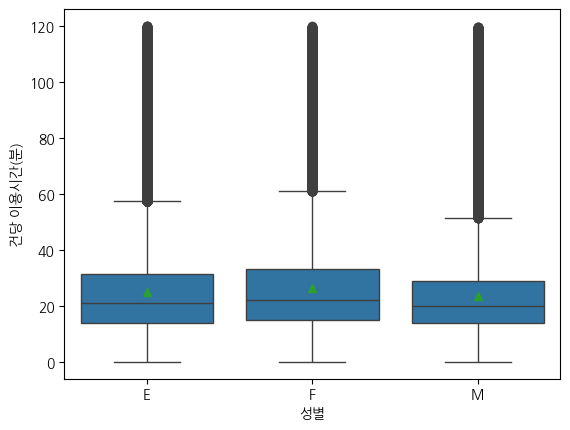

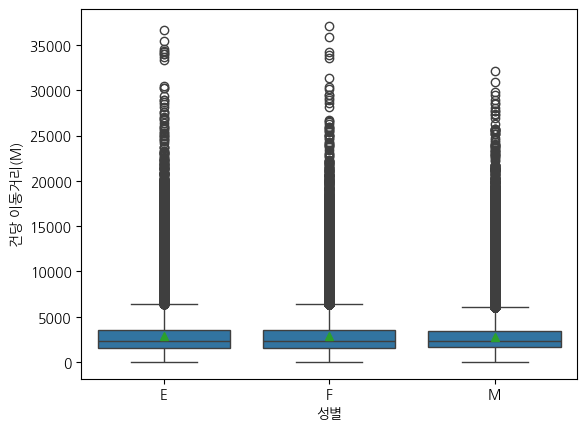

In [36]:
sns.boxplot(data=rental_usage_new, x="성별", y="이용건수", showmeans=True)
plt.show()

sns.boxplot(data=rental_usage_new, x="성별", y="건당 이용시간(분)", showmeans=True)
plt.show()

sns.boxplot(data=rental_usage_new, x="성별", y="건당 이동거리(M)", showmeans=True)
plt.show()

month  성별
01     E     28353
       F     27657
       M     33629
02     E     30027
       F     30078
       M     35164
03     E     32450
       F     33090
       M     36925
04     E     34435
       F     35327
       M     38392
05     E     34631
       F     35295
       M     38581
06     E     34312
       F     35094
       M     38493
Name: 이용건수, dtype: int64


<Axes: xlabel='month', ylabel='이용건수'>

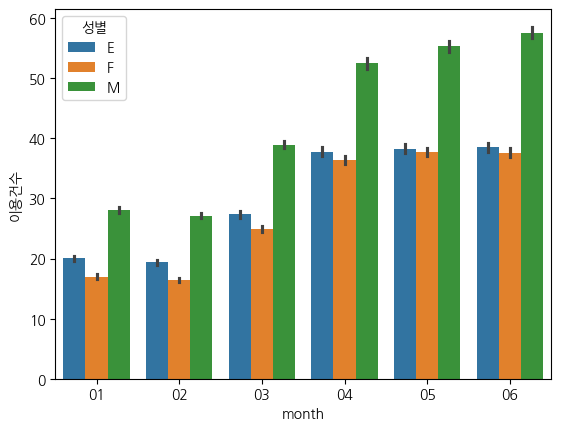

In [111]:
# print(rental_usage_new.head())
rental_usage_new["month"] = rental_usage_new.loc[:, "대여일자"].apply(lambda x: str(x)[-2:])
# print(rental_usage_new.head())

# # 월별 성별별 이용시간
# sns.boxplot(data=rental_usage_new, x="month", y="건당 이용시간(분)", showmeans=True)
# plt.show()
gender_month = rental_usage_new.groupby(["month", "성별"])["이용건수"].count()
print(gender_month)

# 월별 성별별 이용 건수
sns.barplot(rental_usage_new, x="month", y="이용건수", hue="성별")
# sns.barplot(rental_usage_new.groupby(["month", "성별"])["이용건수"].count())
# plt.title("이용건수 카운트")
# plt.show()

# sns.barplot(rental_usage_new.groupby(["month", "성별"])["이용건수"].sum())
# plt.title("이용건수 합")
# plt.show()

# sns.barplot(rental_usage_new.groupby(["month", "성별"])["이용건수"].mean())
# plt.title("이용건수 평균")
# plt.show()

# # 월별 성별별 건당 이용시간 평균
# sns.barplot(rental_usage_new.groupby(["month", "성별"])["건당 이용시간(분)"].mean())
# plt.show()

# # 월별 성별별 건당 이동거리 평균
# sns.barplot(rental_usage_new.groupby(["month", "성별"])["건당 이동거리(M)"].mean())
# plt.show()